In [2]:
from datascience import * 
import numpy as np 
import matplotlib.pyplot as plots 
plots.style.use('fivethirtyeight') 
%matplotlib inline 

main = Table.read_table('agesex.csv').select(0,1,2,9)
main

SEX,AGE,CENSUS2010POP,POPESTIMATE2015
0,0,3944153,3978038
0,1,3978070,3968564
0,2,4096929,3966583
0,3,4119040,3974061
0,4,4063170,4020035
0,5,4056858,4018158
0,6,4066381,4019207
0,7,4030579,4148360
0,8,4046486,4167887
0,9,4148353,4133564


In [7]:
#Here I calculated the Annual Growth and appended that column to the 'main' table

growth = ((main.column(3)/main.column(2)) ** (0.2)) - 1
new = main.with_column('Annual Growth',growth).sort('Annual Growth',descending = True)
new

SEX,AGE,CENSUS2010POP,POPESTIMATE2015,Annual Growth
1,100,9162,15088,0.104913
1,98,9259,14719,0.097142
1,97,14556,23092,0.09669
1,99,6073,9577,0.0953811
1,94,43531,68135,0.0937406
1,95,30951,48015,0.0917934
1,96,21424,32585,0.0874854
1,93,59037,88660,0.0847276
1,68,1087296,1623929,0.0835373
0,68,2323672,3436357,0.0813958


In [22]:
#Selecting the Male info out of the table and dropping unrelated columns

male = new.where('SEX',1).where("AGE", are.between(0,101)).relabeled(3,"Male Population").relabeled("AGE","Age")
male = male.drop(0,2,4)
male


Age,Male Population
100,15088
98,14719
97,23092
99,9577
94,68135
95,48015
96,32585
93,88660
68,1623929
92,113834


In [25]:
#Selecting Female info and dropping unrelated columns

female = new.where('SEX',2).where("AGE", are.between(0,101)).relabeled(3,"Female Population").relabeled("AGE","Age")
female = female.drop(0,2,4)
female

Age,Female Population
68,1812428
100,61886
64,1857069
72,1328954
94,164983
99,34064
93,205146
97,69285
98,47272
65,1812107


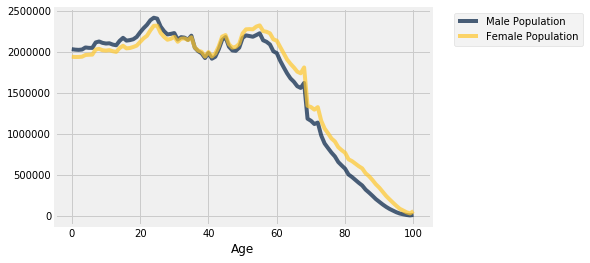

In [26]:
#Joining the new Male & Female tables and plotting them on a line graph

new = male.join('Age',female,'Age')
new.plot(0)